# 데이터 출처
* Pima Indians 당뇨병 데이터셋(Pima Indians Diabetes Database)
* 캐글 URL : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## 데이터 구성
* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 필요한 라이브러리 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [67]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [68]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 학습, 예측 데이터셋 나누기

* 인슐린 값이 0인 값을 test 세트로 가정하여 예측하기

In [69]:
# label 값을 기준으로 나누기
# 나누기 전에 label 값을 시각화
(df["Insulin"] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [70]:
# train 세트 만들기 (0이 아닌 값)
train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [71]:
# test 세트 만들기(0인 값)
test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

# EDA

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

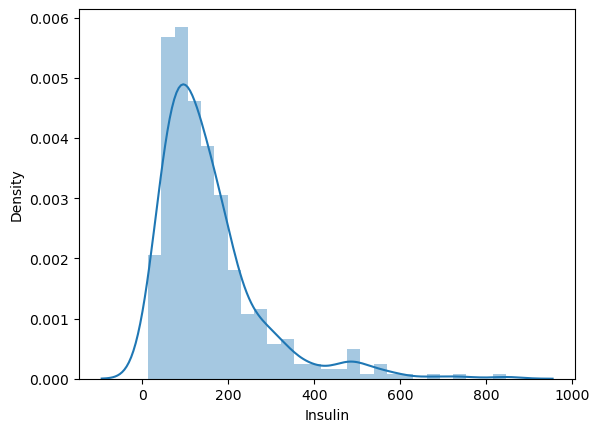

In [34]:
sns.distplot(train["Insulin"])

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

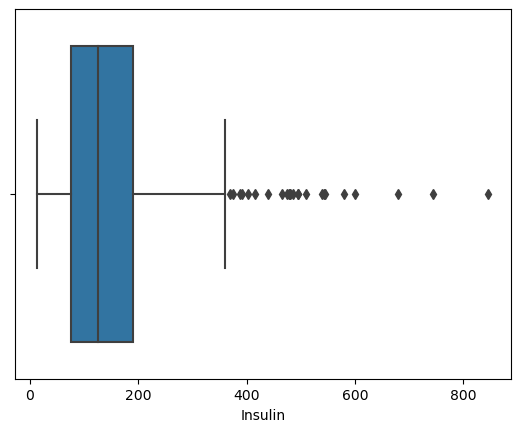

In [35]:
sns.boxplot(train["Insulin"])

In [37]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [48]:
# IQR = 3IQR - 1IQR
# Out = 3QR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [49]:
# Out보다 큰 값의 개수
train[train["Insulin"] > OUT].shape
# 24개

(24, 9)

In [50]:
# print(train.shape)
# # 600보다 작은 값만 train 데이터에 저장 => 390개
# train = train[train["Insulin"]<600]
# train.shape

(394, 9)


(390, 9)

In [72]:
# OUT보다 작은 값만 train 데이터에 저장 => 370개
train = train[train["Insulin"]<OUT]
train.shape

(370, 9)

# 학습, 예측에 사용할 컬럼

In [7]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
# Insulin 컬럼 제외

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# 정답이자 예측해야 될 값

In [73]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = "Insulin"
label_name

'Insulin'

# 학습, 예측 데이터셋 만들기

In [74]:
# 학습 세트 만들기

X_train = train[feature_names]
X_train.shape

(370, 8)

In [75]:
# 정답 값 만들기

y_train = train[label_name]
y_train.shape

(370,)

In [76]:
# 예측에 사용할 test 데이터세트 만들기

X_test = test[feature_names]
X_test.shape

(374, 8)

In [77]:
# 예측의 정답 값

y_test = test[label_name]
y_test.shape

(374,)

# 머신러닝 알고리즘 가져오기

In [78]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

# 학습(훈련)

* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사

In [79]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# cross validation으로 학습 세트의 오차 측정하기

In [80]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


array([ 25., 182.,  55., 144., 220.])

In [81]:
# 분류 알고리즘처럼 정답을 정확하게 맞춘 개수 구하기
# 회귀의 경우 특정한 정수값으로 예측하는 것이 아니기 때문에 정답 개수가 현저히 낮을 수 있음.
(y_predict == y_train).sum()

7

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

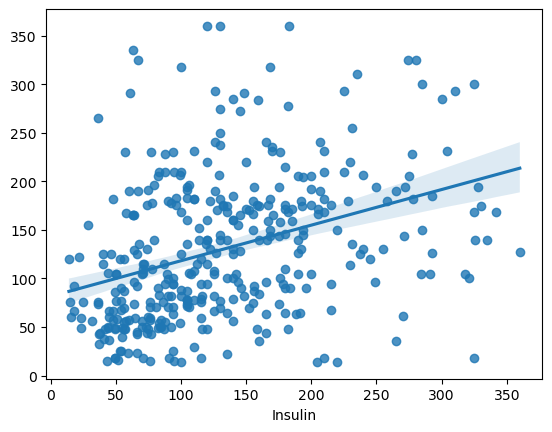

In [82]:
# rdgplot으로 결과 값 비교

sns.regplot(y_train, y_predict)

# x축이 정답값(y_train), y축이 예측값(y_predict)
# 회귀선에 예측값과 정답값이 붙어 있을수록 정확하나, 200 이상이상치 많다.

In [83]:
# r2_score 구하기

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

# r2_score가 1에 가까워야지 정확

-0.28551906710833275

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

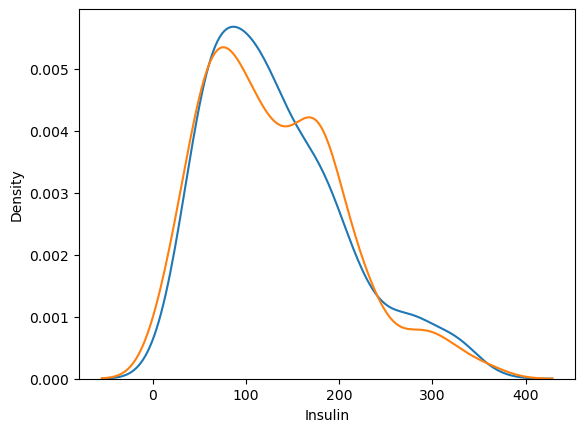

In [84]:
# distplot으로 정답값과 예측값의 분포 그리기

sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_predict, hist=False, label="predict")

# 대체로 비슷하게 그려졌으나 약 500에서 두 그래프가 다르게 그려짐

# 오차 구하기

In [85]:
# MAE(error 절대값들의 평균)
# 86 -> 77.55(600이하 값 제거) -> 62.05(OUT 이상 값 제거)

error = abs(y_train - y_predict)
error.mean()

62.056756756756755

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

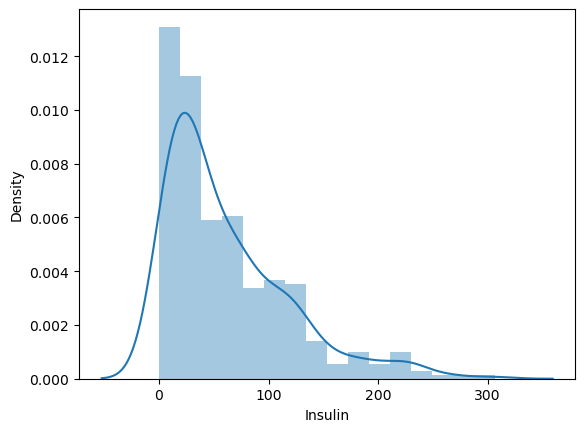

In [86]:
# 오차(정답값-예측값)의 분포 그래프로
sns.distplot(error)

# 오차가 100이하인 값들이 많고 오차가 큰 값들은 존재하나 수가 적음

In [87]:
error.describe()

count    370.000000
mean      62.056757
std       56.854443
min        0.000000
25%       19.250000
50%       42.500000
75%       89.750000
max      307.000000
Name: Insulin, dtype: float64

In [88]:
# RMSE(error 제곱 -> 평균 -> 루트)
# 126.89512636995443
# 114.07729048819579(600 이상값 제거)
# 84.11142866717003(OUT 이상값 제거)

np.sqrt(((y_train - y_predict) ** 2).mean())

84.11142866717003

# 트리 알고리즘 분석하기
* 의사결정나무를 시각화
* 피처의 중요도 구하기

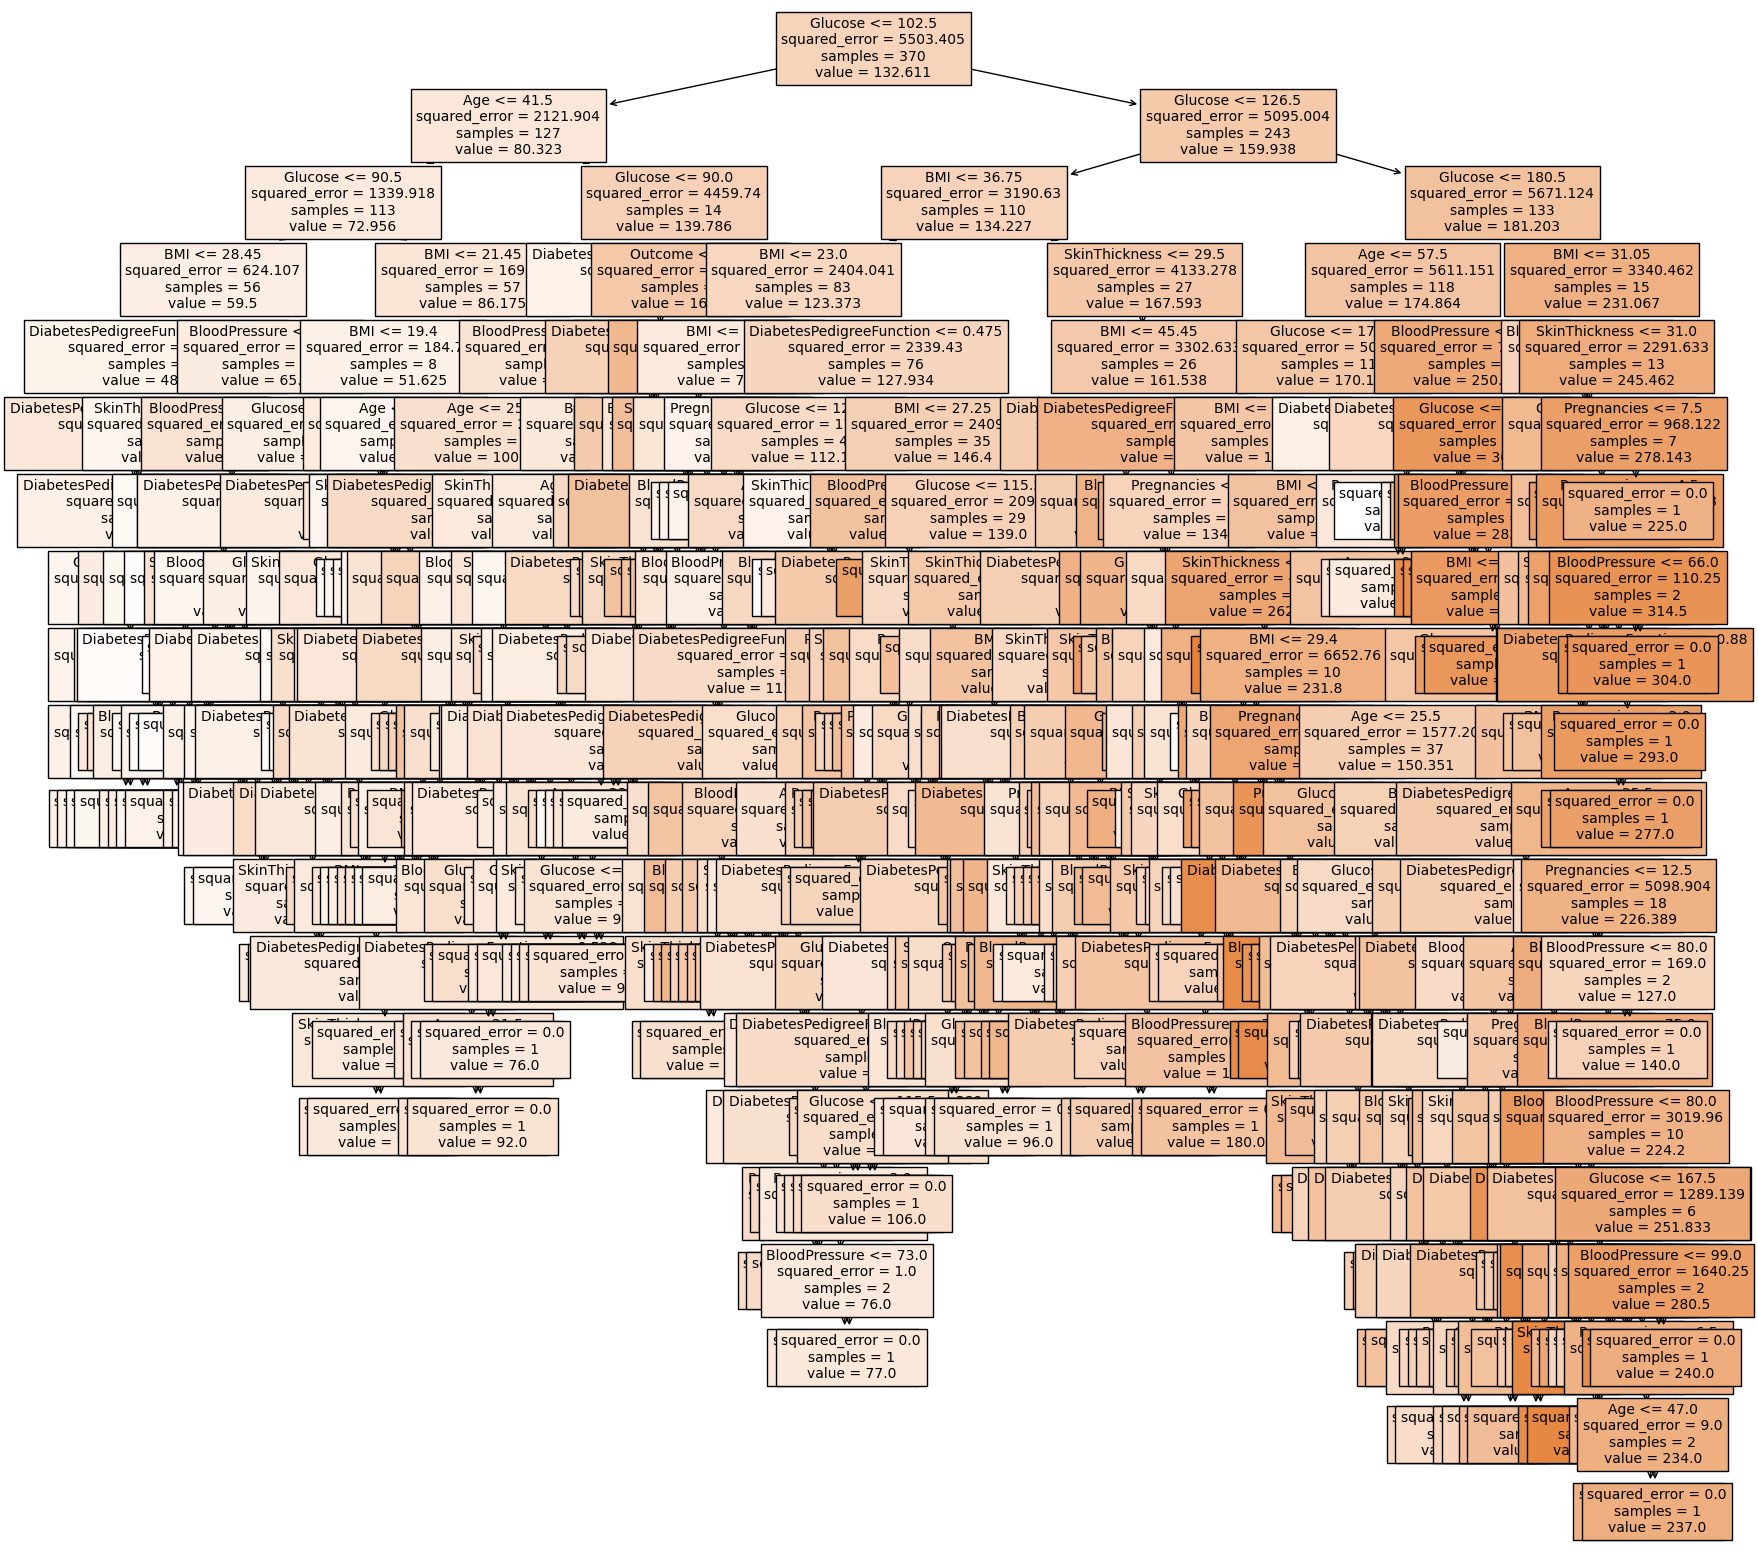

In [89]:
# plot_tree로 시각화

from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [90]:
# 피처의 중요도 추출

model.feature_importances_

array([0.04858345, 0.44656558, 0.07097731, 0.05588694, 0.16087336,
       0.09607089, 0.11025783, 0.01078464])

<AxesSubplot:>

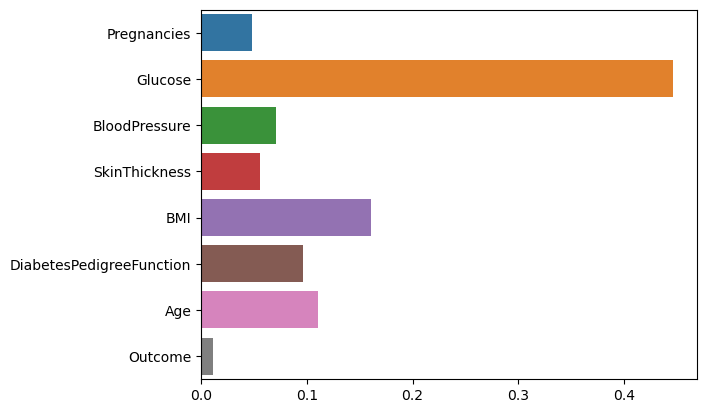

In [91]:
# 피처 중요도 시각화

sns.barplot(x=model.feature_importances_, y=feature_names)

# 예측
* 실전 시험문제(X_test)라고 보면 됨. 우리가 정답을 직접 예측.
* Insulin이 0인 값을 예측했기 때문엥 정답을 알 수 없음.
* 따라서 점수는 train set으로 측정한 값을 참고.

In [92]:
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 130., 215., 165.])

In [93]:
train.groupby("Outcome")["Insulin"].agg(["mean", "median"])

,mean,median
Outcome,,
0,115.917323,100.0
1,169.163793,160.0


In [94]:
test["Insulin"] = y_test

In [95]:
test.groupby("Outcome")["Insulin"].agg(["mean", "median"])

,mean,median
Outcome,,
0,124.906780,97.5
1,163.724638,145.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

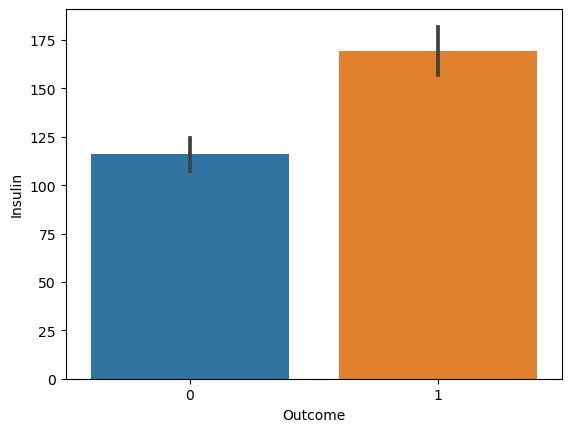

In [96]:
# Insulin 평균값
sns.barplot(data=train, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

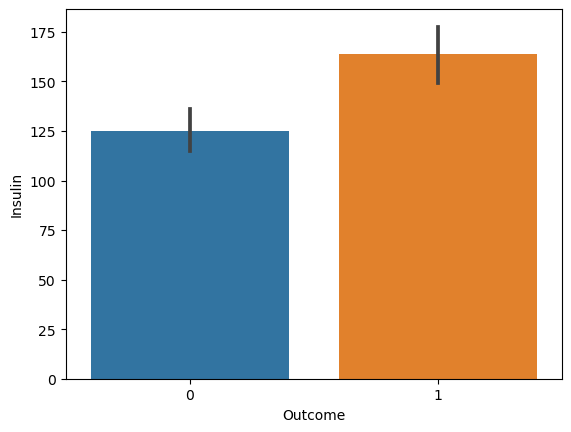

In [97]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")